# Temperature Prediction


In [2]:
# imporitng libraries
import pandas as pd
import numpy as np
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

## EDA

In [2]:
# reading the global teperatures dataset
global_temp = pd.read_csv("/content/GlobalTemperatures.csv")
global_temp.sample(5)

dt  ...  LandAndOceanAverageTemperatureUncertainty
967   1830-08-01  ...                                        NaN
2530  1960-11-01  ...                                      0.073
2707  1975-08-01  ...                                      0.079
772   1814-05-01  ...                                        NaN
719   1809-12-01  ...                                        NaN

[5 rows x 9 columns]

### Automated EDA

In [ ]:
!pip3 install pandas_profiling --upgrade

In [3]:
import pandas_profiling as pf 
pf.ProfileReport(global_temp)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Is there global warning?

* As you can see that the "dt" contains the dates based on the each year.
* Creating a new column which contains each years

In [8]:
# adding the new column 
def fetch_year(date):
    return date.split('-')[0]

global_temp['years']=global_temp['dt'].apply(fetch_year)

global_temp.head()

dt  ...  years
0  1750-01-01  ...   1750
1  1750-02-01  ...   1750
2  1750-03-01  ...   1750
3  1750-04-01  ...   1750
4  1750-05-01  ...   1750

[5 rows x 10 columns]

* Grouping the table using the year column as there are many column which contains many columns with null values, also reseting the indexes.

In [20]:
# grouping by 
# data = global_temp.groupby("years").agg({"LandAverageTemperature": "mean", "LandAverageTemperatureUncertainty":"mean"}).reset_index()
# data.head()
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [25]:
data['Uncertainity_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head()

years  LandAverageTemperature  ...  Uncertainity_top  Uncertainity_bottom
0  1750                8.719364  ...         11.357182             6.081545
1  1751                7.976143  ...         10.757286             5.195000
2  1752                5.779833  ...          8.756833             2.802833
3  1753                8.388083  ...         11.564083             5.212083
4  1754                8.469333  ...         11.963583             4.975083

[5 rows x 7 columns]

In [51]:
import plotly.graph_objs as go
fig = go.Figure()
for col in ['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom']:
    fig.add_trace(go.Line(x=data.years, y=data[col],name=col))
fig.show()

From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

### Analyzing average temperatures in each season.

In [52]:
## parsing dt column to datetime 
global_temp["dt"] = pd.to_datetime(global_temp["dt"])
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [53]:
# adding month column
global_temp["month"] = global_temp["dt"].dt.month
global_temp.head()

dt  LandAverageTemperature  ...  years  month
0 1750-01-01                   3.034  ...   1750      1
1 1750-02-01                   3.083  ...   1750      2
2 1750-03-01                   5.626  ...   1750      3
3 1750-04-01                   8.490  ...   1750      4
4 1750-05-01                  11.573  ...   1750      5

[5 rows x 11 columns]

In [55]:
# function to find the seasonss based on the month
def get_season(month):
  if month >= 3 and month <= 5:
    return 'spring'
  elif month >= 6 and month <= 8:
    return "summer"
  elif month >=9 and month <= 11:
    return "autumn"
  else:
    return "winter"

global_temp["season"] = global_temp["month"].apply(get_season)

global_temp.sample(5)

dt  LandAverageTemperature  ...  month  season
856  1821-05-01                  11.300  ...      5  spring
198  1766-07-01                  13.555  ...      7  summer
1786 1898-11-01                   5.452  ...     11  autumn
1222 1851-11-01                   4.973  ...     11  autumn
1121 1843-06-01                  12.530  ...      6  summer

[5 rows x 12 columns]

In [56]:
# unique years
global_temp['years'].value_counts()

1941    12
1998    12
1844    12
1964    12
1852    12
        ..
1855    12
1790    12
1772    12
1849    12
1812    12
Name: years, Length: 266, dtype: int64

In [64]:
years = global_temp['years'].unique()
spring, summer, autumn, winter = [], [], [], []

for year in years:
  df = global_temp[global_temp["years"] == year]
  spring.append(df[df["season"] == 'spring']["LandAverageTemperature"].mean())
  summer.append(df[df["season"] == 'summer']["LandAverageTemperature"].mean())
  autumn.append(df[df["season"] == 'autumn']["LandAverageTemperature"].mean())
  winter.append(df[df["season"] == 'winter']["LandAverageTemperature"].mean())

season = pd.DataFrame()

season['year'] = years
season['spring'] = spring
season['winter'] = winter
season['summer'] = summer
season['autumn'] = autumn

season.sample(3)

year  spring    winter     summer  autumn
43   1793   8.248  2.434333  13.547333   8.687
13   1763   6.716  1.841333  14.262667   7.167
131  1881   8.166  2.761000  13.552667   8.604

In [67]:
fig = go.Figure()
for col in ['spring', 'winter', 'autumn', 'summer']:
    fig.add_trace(go.Line(x=season.year, y=season[col], name=col))
fig.show()

* Season wise it is getting warmer.

## EDA on City data

In [3]:
city = pd.read_csv("/content/drive/MyDrive/temperature/GlobalLandTemperaturesByCity.csv")
city.sample(10)

dt  AverageTemperature  ...  Latitude Longitude
1159749  1886-02-01              -2.682  ...    52.24N    10.51E
6776389  1941-10-01               8.089  ...    44.20N    17.89E
7377200  1925-11-01              12.114  ...    34.56N   136.22E
7524923  1942-05-01              27.457  ...     5.63S   106.55E
2094161  1850-02-01               4.205  ...    50.63N     6.34E
6393285  1974-09-01              14.475  ...    42.59N    78.55W
2605519  1885-09-01              29.414  ...    31.35N    73.51E
655973   1933-07-01              24.956  ...     8.84S   114.32E
3176894  1816-06-01              19.594  ...    39.38N    85.32W
2532069  1836-03-01               7.018  ...    52.24N     7.88E

[10 rows x 7 columns]

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

RuntimeError: ignored

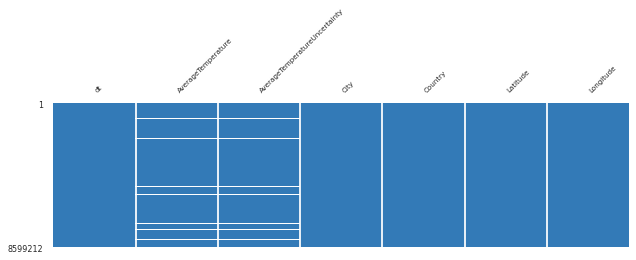

In [74]:
pf.ProfileReport(city)

In [4]:
# keeping only the ncessary city data 
usa=city[city['Country']=='United States']
data=['New York','Los Angeles','San Francisco']
data2=usa[usa['City'].isin(data)]
data2.head()

dt  AverageTemperature  ...  Latitude Longitude
4356748  1849-01-01               8.819  ...    34.56N   118.70W
4356749  1849-02-01               9.577  ...    34.56N   118.70W
4356750  1849-03-01              11.814  ...    34.56N   118.70W
4356751  1849-04-01              13.704  ...    34.56N   118.70W
4356752  1849-05-01              14.834  ...    34.56N   118.70W

[5 rows x 7 columns]

In [5]:
# keepin only the necessary columns
data2=data2[['dt','AverageTemperature']]

# renaming the column 
data2.columns=['Date','Temp']
data2.head()

Date    Temp
4356748  1849-01-01   8.819
4356749  1849-02-01   9.577
4356750  1849-03-01  11.814
4356751  1849-04-01  13.704
4356752  1849-05-01  14.834

In [6]:
# parsing the date column 
data2['Date']=pd.to_datetime(data2['Date'])

In [7]:
# checking for null values
data2.isnull().sum()

Date      0
Temp    120
dtype: int64

In [8]:
# dropping the missing values
data2.dropna(inplace=True)

In [9]:
data2.shape

(7073, 2)

In [10]:
### note: for Machine Learning,feature is a columns & we have by-default index as from 0 but for our time series Problem,we have date column our as row-index
data2.set_index('Date',inplace=True)

In [11]:
data2.head()

Temp
Date              
1849-01-01   8.819
1849-02-01   9.577
1849-03-01  11.814
1849-04-01  13.704
1849-05-01  14.834

### Stationarity check

* For data to be stationary the mean and standard deviation has to be constant.
* can check stationarity using
  * graph using lineplot
  * statistical test using adfuller test

Text(0.5, 1.0, 'Lineplot of temperature')

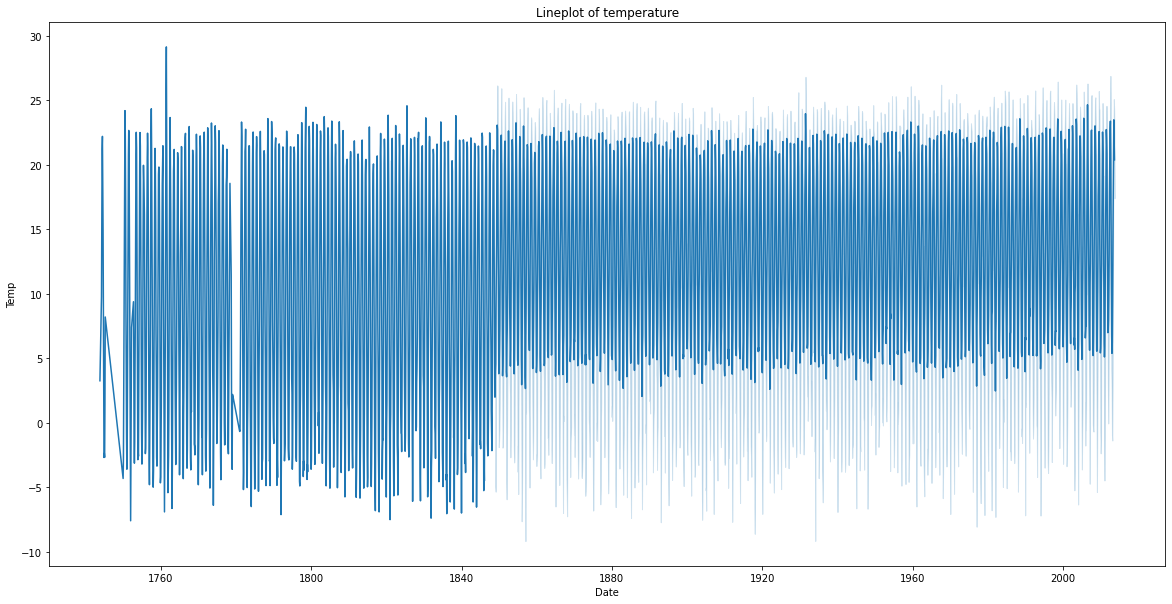

In [84]:
# lineplot to see stationarioyt
plt.figure(figsize=(20,10))
sns.lineplot(x=data2.index, y=data2['Temp']).set_title("Lineplot of temperature")

* from the graph its not clear whether the data is stationarity as there are spikes at some instances.

In [88]:
# adf test 

from statsmodels.tsa.stattools import adfuller

# applying test 
def adfuller_test(Temp):
    result = adfuller(Temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
      print()
      print(label+' : '+str(value) )
    if result[1] <= 0.05:
      print()
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
      print()
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(data2['Temp'])    


ADF Test Statistic : -2.0063893036757956

p-value : 0.28377865833332594

#Lags Used : 35

Number of Observations Used : 7037

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


* if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

* Ho: ie null hypoIt is non stationary
* H1: ie Alternate Hypo ,It is stationary

In [12]:
# copying the data
df = data2.copy()

# differeincing the data to make time series stationary
df['first_temp_diff'] = df['Temp'] - df["Temp"].shift(12)
df.head()

Temp  first_temp_diff
Date                               
1849-01-01   8.819              NaN
1849-02-01   9.577              NaN
1849-03-01  11.814              NaN
1849-04-01  13.704              NaN
1849-05-01  14.834              NaN

In [90]:
# again checking for the statinarity 
adfuller_test(df['first_temp_diff'].dropna())


ADF Test Statistic : -21.23965040491091

p-value : 0.0

#Lags Used : 35

Number of Observations Used : 7025

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


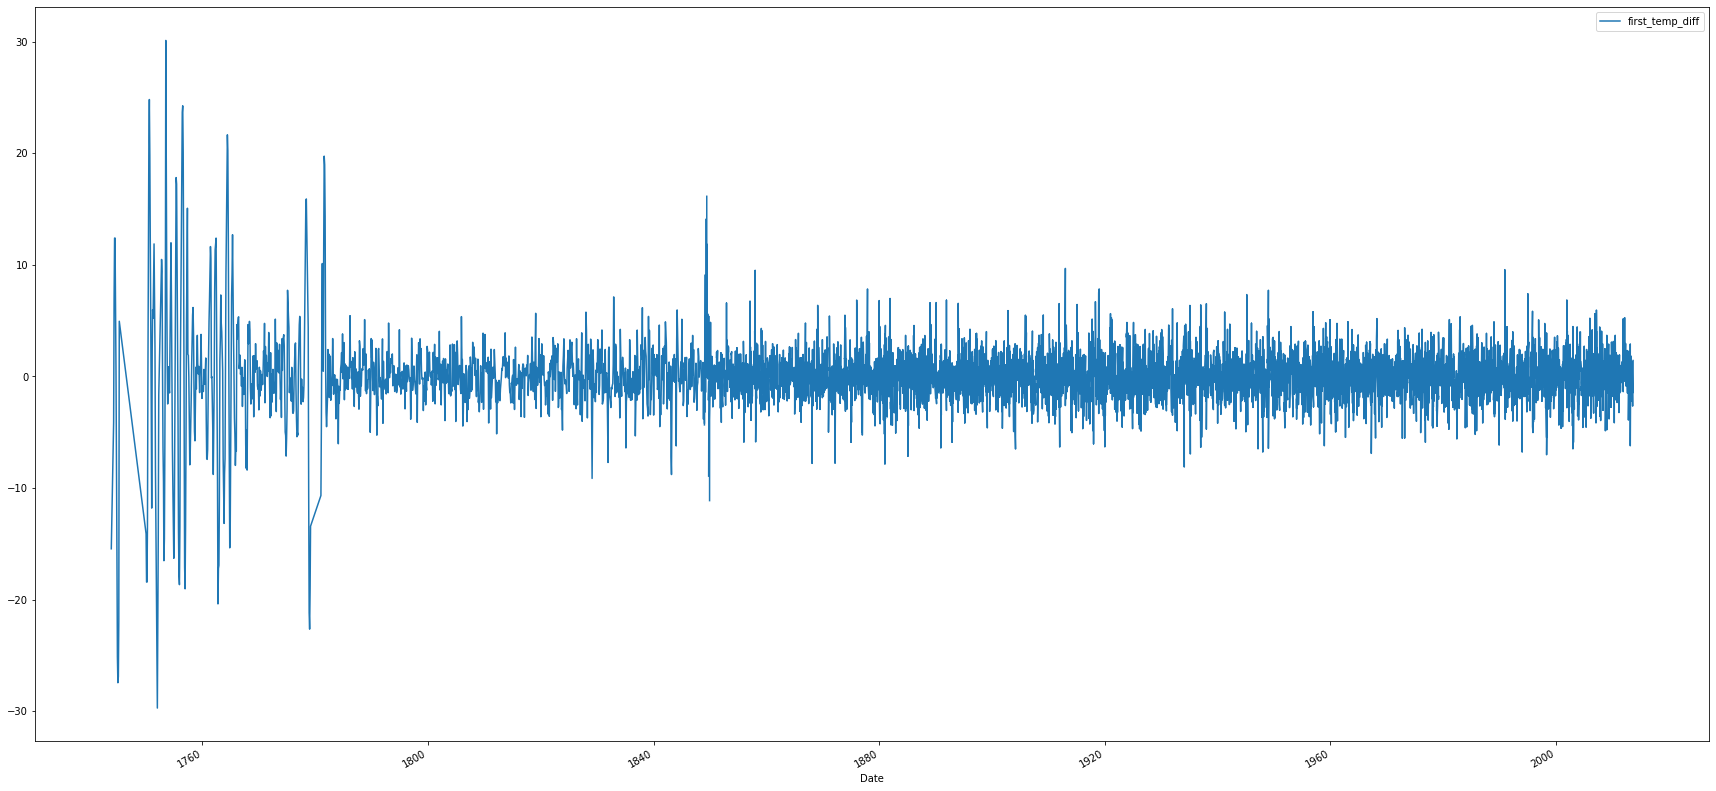

In [91]:
df[['first_temp_diff']].plot(figsize=(30,15))

### Seasonality factor

In [92]:
data2["month"] = data2.index.month
data2['year'] = data2.index.year
data2.head()

Temp  month  year
Date                           
1849-01-01   8.819      1  1849
1849-02-01   9.577      2  1849
1849-03-01  11.814      3  1849
1849-04-01  13.704      4  1849
1849-05-01  14.834      5  1849

In [93]:
# pivoting the table
pivot = data2.pivot_table(values="Temp", index="month", columns='year')

pivot

year    1743    1744   1745    1750  ...       2010       2011       2012       2013
month                                ...                                            
1        NaN     NaN -2.363  -4.310  ...   5.776667   5.109333   7.177667   5.388333
2        NaN     NaN -2.671  -2.719  ...   6.788000   5.777333   7.970000   6.222667
3        NaN     NaN  1.363   2.773  ...  10.486667   9.115000  10.604333  10.162333
4        NaN   9.788  8.209   8.848  ...  12.254000  12.710000  13.075000  13.880000
5        NaN  15.708    NaN  15.411  ...  15.856333  15.724000  17.670333  17.335333
6        NaN  21.210    NaN  19.017  ...  20.436667  19.305000  19.904333  21.028333
7        NaN  22.207    NaN  24.203  ...  22.538667  22.733333  22.654000  23.489667
8        NaN     NaN    NaN  22.135  ...  21.665333  22.028667  23.384667  21.654667
9        NaN  14.922    NaN  17.445  ...  20.537333  20.856333  20.655667  20.393333
10       NaN   8.968    NaN   9.076  ...  15.170333  15.846667  16.147667        NaN
11     3.264   3.161    NaN     NaN  ...  10.032333  10.378000  10.457667        NaN
12       NaN  -2.681    NaN  -1.093  ...   6.119667   6.991000   6.749333        NaN

[12 rows x 266 columns]

Text(0, 0.5, 'Temperature')

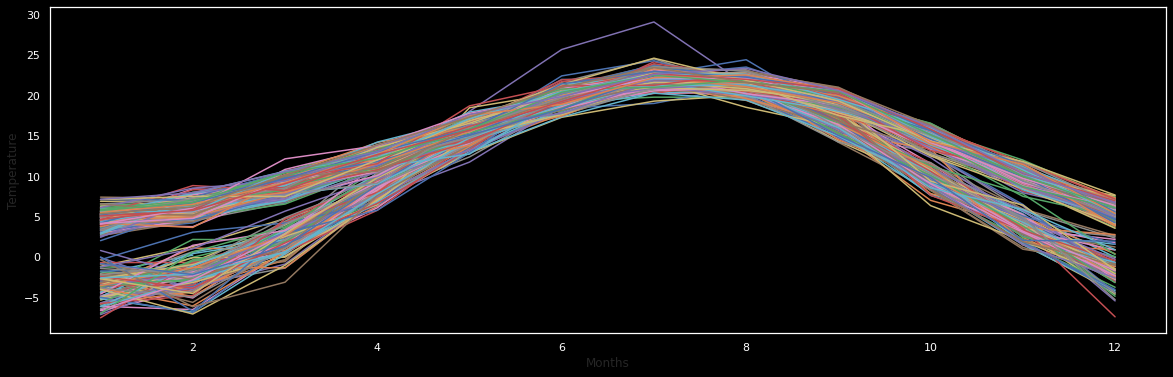

In [98]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 
            'axes.grid' : False, 
            'text.color': 'white',
            'xtick.color': 'white',
            'ytick.color': 'white'})
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel("Temperature")

* looking this graph,we can say this data is seasonal The series clearly has some seasonality, the higher temperatures are around b/w June & August and the lower are between December & Feb so thats basically a observation that u can drawn and represent to ur client¶

Text(0, 0.5, 'mean Temperature')

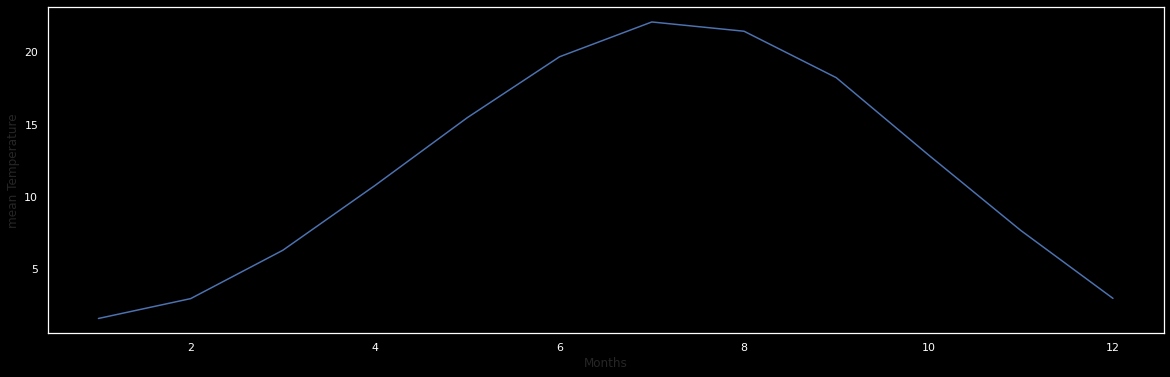

In [99]:
# calculating the mean of temperature based on months
monthly_seasonality = pivot.mean(axis=1)

# plotting the months against the mean temperatures against months 
monthly_seasonality.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel("mean Temperature")

In [100]:
monthly_seasonality

month
1      1.573792
2      2.948777
3      6.299321
4     10.789538
5     15.479486
6     19.695356
7     22.103078
8     21.461610
9     18.245272
10    12.895122
11     7.670145
12     2.965148
dtype: float64

### Smoothening data

In [13]:
df.head()

Temp  first_temp_diff
Date                               
1849-01-01   8.819              NaN
1849-02-01   9.577              NaN
1849-03-01  11.814              NaN
1849-04-01  13.704              NaN
1849-05-01  14.834              NaN

In [14]:
# dropping missing values and considering the stationary column for building mdel
df = df[['first_temp_diff']]
df.dropna(inplace=True)
df.head()

first_temp_diff
Date                       
1850-01-01           -1.732
1850-02-01           -1.002
1850-03-01           -1.449
1850-04-01            0.031
1850-05-01            1.799

In [15]:
# smoothening data using moving average

value = pd.DataFrame(df['first_temp_diff'])

temp_df = pd.concat([value, df['first_temp_diff'].rolling(window=5).mean()], axis=1)

temp_df.columns = ['actual_temp', 'forecast_temp']

temp_df.head(10)

actual_temp  forecast_temp
Date                                  
1850-01-01       -1.732            NaN
1850-02-01       -1.002            NaN
1850-03-01       -1.449            NaN
1850-04-01        0.031            NaN
1850-05-01        1.799        -0.4706
1850-06-01       -0.932        -0.3106
1850-07-01       -2.714        -0.6530
1850-08-01       -0.164        -0.3960
1850-09-01        0.714        -0.2594
1850-10-01        1.028        -0.4136

### Building model 

In [16]:
df.dropna(inplace=True)

In [17]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:], temp_df['actual_temp'][4:]))

2.3934235122562058

#### ARIMA

Text(0, 0.5, 'Cor-relation')

<Figure size 1440x576 with 0 Axes>

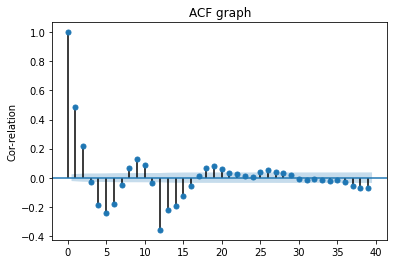

In [18]:
# to fnd the values p,d and q
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize=(20,8))
plot_acf(df['first_temp_diff'].dropna())
plt.title('ACF graph')
plt.ylabel('Cor-relation')

* q = 3 from the above graph as the co-relation between first and third data point is minimum at the 3.

Text(0, 0.5, 'Cor-relation')

<Figure size 1440x576 with 0 Axes>

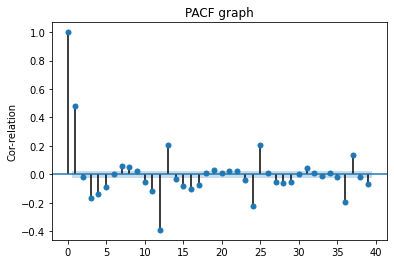

In [19]:
plt.figure(figsize=(20,8))
plot_pacf(df['first_temp_diff'].dropna())
plt.title('PACF graph')
plt.ylabel('Cor-relation')

* p value = 2 from the above graph

In [20]:
training_data=df[0:6000]
### create test that is basically unseen to our model, or which is basocally is used for evalaution
test_data=df[6000:]

In [21]:
from statsmodels.tsa.arima_model import ARIMA

arima=ARIMA(training_data,order=(2,1,3))

model=arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [22]:
predictions=model.forecast(steps=len(test_data))[0]

In [23]:
np.sqrt(mean_squared_error(test_data,predictions))

1.5120431145936981

#### Hyperparameter tuning

In [ ]:
p_values=range(0,4)
q_values=range(0,4)
d_values=range(0,3)

for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df[0:6000]
            test=df[6000:]
            predictions=[]
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)
                    model=arima.fit(disp=0)
                    pred=model.forecast()[0]
                    predictions.append(pred)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

MSE is 2.283672928384571 with order (0, 0, 0)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

MSE is 2.522758527165038 with order (0, 0, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

MSE is 2.2953712895655447 with order (0, 0, 2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

MSE is 2.3855392031479985 with order (0, 0, 3)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:

MSE is 2.6894115719830562 with order (0, 1, 0)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:

MSE is 2.393995712532922 with order (0, 1, 1)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py: